In [90]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from dotenv import load_dotenv

In [91]:
load_dotenv()

True

In [92]:
model = ChatGoogleGenerativeAI(model ='gemini-2.5-flash')

In [93]:
class llm_state(TypedDict):

    runs :int
    balls : int
    fours :int
    sixes:int

    sr:float
    bpb : float
    boundry_percent :float
    summary :str


In [103]:
def calculate_sr(state:llm_state):
    sr = (state['runs']/state['balls'])*100
    
    return {'sr':sr}

In [104]:
def balls_per_boundry(state:llm_state):

    bpb = state['balls']/(state['fours']+state['sixes'])
    return {'bpb': bpb}



In [112]:
def boundry_percentage(state:llm_state):

    boundry_percent = (((state['fours']*4)+(state['sixes']*6))/state['runs'])*100
    return {'boundry_percent': boundry_percent}



In [121]:
def  summary(state:llm_state):
    summary = f"""
strike_rate - {state['sr']} \n
Balls per boundry- {state['bpb']} \n
Boundry_percent - { state['boundry_percent']}"""
    
    return {'summary':summary}

In [122]:
graph = StateGraph(llm_state)

In [123]:
graph.add_node('calculate_sr', calculate_sr)
graph.add_node('balls_per_boundry',balls_per_boundry)
graph.add_node('boundry_percentage', boundry_percentage)
graph.add_node('summary',summary)


graph.add_edge(START,'calculate_sr')
graph.add_edge(START,'balls_per_boundry')
graph.add_edge(START,'boundry_percentage')

graph.add_edge('calculate_sr','summary')
graph.add_edge('balls_per_boundry','summary')
graph.add_edge('boundry_percentage','summary')

graph.add_edge('summary',END)

In [124]:
workflow = graph.compile()

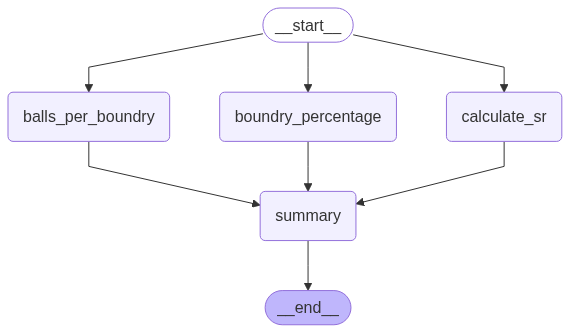

In [125]:
workflow

In [126]:
intial_state = {'runs':100,'balls':50,'fours':6,'sixes':6}

final_state = workflow.invoke(intial_state)
print(final_state)

{'runs': 100, 'balls': 50, 'fours': 6, 'sixes': 6, 'sr': 200.0, 'bpb': 4.166666666666667, 'boundry_percent': 60.0, 'summary': '\nstrike_rate - 200.0 \n\nBalls per boundry- 4.166666666666667 \n\nBoundry_percent - 60.0'}
